In [1]:
%load_ext autoreload
%autoreload 2

# Clasificación de minas por medio de A-Scans (MPDL-LR)

## Importación de librerías

In [2]:
import logging
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from utils import read_c_scan, plot_mine_map
from dictionary_learning import MPDLLRClassifier

from skopt import BayesSearchCV
from skopt.space import Real, Integer

In [3]:
logging.basicConfig(level=logging.DEBUG, force=True)
log = logging.getLogger(__name__)

## Carga de Escenarios

In [4]:
# Tiempo máximo a utilizar
# La híperbolas se encuentran en este
max_t_idx = 90

### Escenario 1 - Solo Arena
Utilizado para la estimación del fondo en el algoritmo MPDL-LR

In [5]:
c_scan, x, y, t = read_c_scan(r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\C-Scans Daniel\C_Scan_time_raw_1.h5", 'x')
qx, qy, qt = c_scan.shape
#c_scan, t = signal.resample(c_scan, 250, t, axis=2)
t = t[:max_t_idx]
qt = t.size
X_1 = np.real(np.reshape(c_scan[:,:,:qt], (qx * qy, qt)))

In [6]:
c_scan, x, y, t = read_c_scan(r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\C-Scans Gabriel\C_scan_default_title_1.h5", 'x')
qx, qy, qt = c_scan.shape
#c_scan, t = signal.resample(c_scan, 250, t, axis=2)
t = t[:max_t_idx]
qt = t.size
X_1_g = np.real(np.reshape(c_scan[:,:,:qt], (qx * qy, qt)))

### Escenario 2 - Esfera metálica

In [7]:
c_scan, x, y, t = read_c_scan(r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\C-Scans Daniel\C_Scan_time_raw_2.h5", 'x')

qx, qy, qt = c_scan.shape
#c_scan, t = signal.resample(c_scan, 250, t, axis=2)
t = t[:max_t_idx]
qt = t.size
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
X_2 = np.real(np.reshape(c_scan[:,:,:qt], (qx * qy, qt)))

mine_map = np.zeros((y.size, x.size))

cx = 350
cy = 350
r = 35

mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
mine_map[mask] = 1

y_2 = np.reshape(mine_map, (qx * qy))

In [8]:
c_scan, x, y, t = read_c_scan(r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\C-Scans Gabriel\C_scan_default_title_2.h5", 'x')

qx, qy, qt = c_scan.shape
#c_scan, t = signal.resample(c_scan, 250, t, axis=2)
t = t[:max_t_idx]
qt = t.size
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
X_2_g = np.real(np.reshape(c_scan[:,:,:qt], (qx * qy, qt)))

mine_map = np.zeros((y.size, x.size))

cx = 350
cy = 350
r = 35

mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
mine_map[mask] = 1

y_2_g = np.reshape(mine_map, (qx * qy))

### Escenario 3 - Esfera metálica

In [9]:
c_scan, x, y, t = read_c_scan(r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\C-Scans Daniel\C_Scan_time_raw_3.h5", 'x')

qx, qy, qt = c_scan.shape
#c_scan, t = signal.resample(c_scan, 250, t, axis=2)
t = t[:max_t_idx]
qt = t.size
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
X_3 = np.real(np.reshape(c_scan[:,:,:qt], (qx * qy, qt)))

mine_map = np.zeros((y.size, x.size))

cx = 350
cy = 350
r = 35

mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
mine_map[mask] = 1

y_3 = np.reshape(mine_map, (qx * qy))

In [10]:
c_scan, x, y, t = read_c_scan(r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\C-Scans Gabriel\C_scan_default_title_3.h5", 'x')

qx, qy, qt = c_scan.shape
#c_scan, t = signal.resample(c_scan, 250, t, axis=2)
t = t[:max_t_idx]
qt = t.size
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
X_3_g = np.real(np.reshape(c_scan[:,:,:qt], (qx * qy, qt)))

mine_map = np.zeros((y.size, x.size))

cx = 350
cy = 350
r = 35

mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
mine_map[mask] = 1

y_3_g = np.reshape(mine_map, (qx * qy))

### Escenario 4 - Solo arena

In [11]:
c_scan, x, y, t = read_c_scan(r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\C-Scans Daniel\C_Scan_time_raw_4.h5", 'x')

qx, qy, qt = c_scan.shape
#c_scan, t = signal.resample(c_scan, 250, t, axis=2)
t = t[:max_t_idx]
qt = t.size
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
X_4 = np.real(np.reshape(c_scan[:,:,:qt], (qx * qy, qt)))

mine_map = np.zeros((y.size, x.size))

y_4 = np.reshape(mine_map, (qx * qy))

### Escenario 5 - Mina

In [12]:
c_scan, x, y, t = read_c_scan(r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\C-Scans Daniel\C_Scan_time_raw_5.h5", 'x')

qx, qy, qt = c_scan.shape
#c_scan, t = signal.resample(c_scan, 250, t, axis=2)
t = t[:max_t_idx]
qt = t.size
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
X_5 = np.real(np.reshape(c_scan[:,:,:qt], (qx * qy, qt)))

mine_map = np.zeros((y.size, x.size))

cx = 350
cy = 350
r = 35

mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
mine_map[mask] = 2

y_5 = np.reshape(mine_map, (qx * qy))

### Escenario 6 - Placa metálica

In [13]:
c_scan, x, y, t = read_c_scan(r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\C-Scans Daniel\C_Scan_time_raw_6.h5", 'x')

qx, qy, qt = c_scan.shape
#c_scan, t = signal.resample(c_scan, 250, t, axis=2)
t = t[:max_t_idx]
qt = t.size
X_6 = np.real(np.reshape(c_scan[:,:,:qt], (qx * qy, qt)))

x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)

mine_map = np.zeros((y.size, x.size))

cx = 350
cy = 350
l = 250

mask_x= np.abs(x-cx) < l/2.
mask_y= np.abs(y-cy) < l/2

mine_map[np.ix_(np.flatnonzero(mask_y), np.flatnonzero(mask_x))] = 1

y_6 = np.reshape(mine_map, (qx * qy))

### Escenario 10 - Solo arena

In [14]:
c_scan, x, y, t = read_c_scan(r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\C-Scans Daniel\C_Scan_time_raw_10.h5", 'x')

qx, qy, qt = c_scan.shape
#c_scan, t = signal.resample(c_scan, 250, t, axis=2)
t = t[:max_t_idx]
qt = t.size
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
X_10 = np.real(np.reshape(c_scan[:,:,:qt], (qx * qy, qt)))

mine_map = np.zeros((y.size, x.size))

y_10 = np.reshape(mine_map, (qx * qy))

### Escenario 11 - Mina

In [15]:
c_scan, x, y, t = read_c_scan(r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\C-Scans Daniel\C_Scan_time_raw_11.h5", 'x')

qx, qy, qt = c_scan.shape
#c_scan, t = signal.resample(c_scan, 250, t, axis=2)
t = t[:max_t_idx]
qt = t.size
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
X_11 = np.real(np.reshape(c_scan[:,:,:qt], (qx * qy, qt)))

mine_map = np.zeros((y.size, x.size))

cx = 350
cy = 350
r = 35

mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
mine_map[mask] = 2

y_11 = np.reshape(mine_map, (qx * qy))

### Escenario 0 - Para escenarios 1, 2, 5

In [16]:
c_scan, x, y, t = read_c_scan(r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\Nuevas mediciones\Time\C_scan_default_title_0_125_new.h5", 'x')

qx, qy, qt = c_scan.shape
#c_scan, t = signal.resample(c_scan, 250, t, axis=2)
t = t[:max_t_idx]
qt = t.size
X_0_125_new = np.real(np.reshape(c_scan[:,:,:qt], (qx * qy, qt)))

### Escenario 0 - Nuevo para escenarios 3 y 4

In [17]:
c_scan, x, y, t = read_c_scan(r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\Nuevas mediciones\Time\C_scan_default_title_0_34_new.h5", 'x')

qx, qy, qt = c_scan.shape
#c_scan, t = signal.resample(c_scan, 250, t, axis=2)
t = t[:max_t_idx]
qt = t.size
X_0_34_new = np.real(np.reshape(c_scan[:,:,:qt], (qx * qy, qt)))

### Escenario 1 - Nuevo

In [18]:
c_scan, x, y, t = read_c_scan(r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\Nuevas mediciones\Time\C_scan_default_title_1_new.h5", 'x')

qx, qy, qt = c_scan.shape
#c_scan, t = signal.resample(c_scan, 250, t, axis=2)
t = t[:max_t_idx]
qt = t.size
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
X_1_new = np.real(np.reshape(c_scan[:,:,:qt], (qx * qy, qt)))

mine_map = np.zeros((y.size, x.size))

cx, cy, r = 175, 525, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis,:]-cy)**2 < r**2
mine_map[mask] = 1

cx, cy, a, b = 525, 175, 66.3/2, 60.20/2
mask = (x[:,np.newaxis]-cx)**2/a**2 + (y[np.newaxis,:]-cy)**2/b**2 < 1
mine_map[mask] = 2

cx, cy, lx, ly = 175, 175, 200, 250
mask_x= np.abs(x-cx) < lx/2
mask_y= np.abs(y-cy) < ly/2
mine_map[np.ix_(np.flatnonzero(mask_x), np.flatnonzero(mask_y))] = 1

cx, cy, lx, ly = 525, 525, 200, 250
mask_x= np.abs(x-cx) < lx/2
mask_y= np.abs(y-cy) < ly/2
mine_map[np.ix_(np.flatnonzero(mask_x), np.flatnonzero(mask_y))] = 1

y_1_new = np.reshape(mine_map, (qx * qy))

### Escenario 2 - Nuevo

In [19]:
c_scan, x, y, t = read_c_scan(r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\Nuevas mediciones\Time\C_scan_default_title_2_new.h5", 'x')

qx, qy, qt = c_scan.shape
#c_scan, t = signal.resample(c_scan, 250, t, axis=2)
t = t[:max_t_idx]
qt = t.size
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
X_2_new = np.real(np.reshape(c_scan[:,:,:qt], (qx * qy, qt)))

mine_map = np.zeros((y.size, x.size))

cx, cy, r = 175, 525, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis,:]-cy)**2 < r**2
mine_map[mask] = 1

cx, cy, a, b = 525, 175, 90.2/2, 46.45/2
mask = (x[:,np.newaxis]-cx)**2/a**2 + (y[np.newaxis,:]-cy)**2/b**2 < 1
mine_map[mask] = 3

cx, cy, a, b = 140, 175, 66.3/2, 60.20/2
mask = (x[:,np.newaxis]-cx)**2/a**2 + (y[np.newaxis,:]-cy)**2/b**2 < 1
mine_map[mask] = 2

cx, cy, r = 140*2, 175, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis,:]-cy)**2 < r**2
mine_map[mask] = 1

cx, cy, lx, ly = 525, 525, 200, 250
mask_x= np.abs(x-cx) < lx/2
mask_y= np.abs(y-cy) < ly/2
mine_map[np.ix_(np.flatnonzero(mask_x), np.flatnonzero(mask_y))] = 1

y_2_new = np.reshape(mine_map, (qx * qy))

### Escenario 3 - Nuevo

In [20]:
c_scan, x, y, t = read_c_scan(r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\Nuevas mediciones\Time\C_scan_default_title_3_new.h5", 'x')

qx, qy, qt = c_scan.shape
#c_scan, t = signal.resample(c_scan, 250, t, axis=2)
t = t[:max_t_idx]
qt = t.size
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
X_3_new = np.real(np.reshape(c_scan[:,:,:qt], (qx * qy, qt)))

mine_map = np.zeros((y.size, x.size))

cx, cy, r = 175, 525, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis,:]-cy)**2 < r**2
mine_map[mask] = 1

cx, cy, a, b = 525, 525, 66.3/2, 60.20/2
mask = (x[:,np.newaxis]-cx)**2/a**2 + (y[np.newaxis,:]-cy)**2/b**2 < 1
mine_map[mask] = 2

cx, cy, r = 175, 175, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis,:]-cy)**2 < r**2
mine_map[mask] = 1

cx, cy, a, b = 525, 175, 90.2/2, 46.45/2
mask = (x[:,np.newaxis]-cx)**2/a**2 + (y[np.newaxis,:]-cy)**2/b**2 < 1
mine_map[mask] = 3

cx, cy, r = 350, 350, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis,:]-cy)**2 < r**2
mine_map[mask] = 2

y_3_new = np.reshape(mine_map, (qx * qy))

### Escenario 4 - Nuevo

In [21]:
c_scan, x, y, t = read_c_scan(r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\Nuevas mediciones\Time\C_scan_default_title_4_new.h5", 'x')

qx, qy, qt = c_scan.shape
#c_scan, t = signal.resample(c_scan, 250, t, axis=2)
t = t[:max_t_idx]
qt = t.size
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
X_4_new = np.real(np.reshape(c_scan[:,:,:qt], (qx * qy, qt)))

mine_map = np.zeros((y.size, x.size))

cx, cy, a, b = 525, 525, 66.3/2, 60.20/2
mask = (x[:,np.newaxis]-cx)**2/a**2 + (y[np.newaxis,:]-cy)**2/b**2 < 1
mine_map[mask] = 2

cx, cy, r = 175, 525, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis,:]-cy)**2 < r**2
mine_map[mask] = 1

cx, cy, a, b = 525, 175, 90.2/2, 46.45/2
mask = (x[:,np.newaxis]-cx)**2/a**2 + (y[np.newaxis,:]-cy)**2/b**2 < 1
mine_map[mask] = 3

cx, cy, r = 150, 150, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis,:]-cy)**2 < r**2
mine_map[mask] = 1

cx, cy, l = 350, 350, 250
mask_x= np.abs(x-cx) < 200/2
mask_y= np.abs(y-cy) < l/2
mine_map[np.ix_(np.flatnonzero(mask_x), np.flatnonzero(mask_y))] = 1

y_4_new = np.reshape(mine_map, (qx * qy))

### Escenario 5 - Nuevo

In [22]:
c_scan, x, y, t = read_c_scan(r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\Nuevas mediciones\Time\C_scan_default_title_5_new.h5", 'x')

qx, qy, qt = c_scan.shape
#c_scan, t = signal.resample(c_scan, 250, t, axis=2)
t = t[:max_t_idx]
qt = t.size
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
X_5_new = np.real(np.reshape(c_scan[:,:,:qt], (qx * qy, qt)))

mine_map = np.zeros((y.size, x.size))

cx, cy, a, b = 350, 525, 90.2/2, 46.45/2
mask = (x[:,np.newaxis]-cx)**2/a**2 + (y[np.newaxis,:]-cy)**2/b**2 < 1
mine_map[mask] = 3

cx, cy, a, b = 525, 350, 66.3/2, 60.20/2
mask = (x[:,np.newaxis]-cx)**2/a**2 + (y[np.newaxis,:]-cy)**2/b**2 < 1
mine_map[mask] = 2

cx, cy, r = 350, 175, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis,:]-cy)**2 < r**2
mine_map[mask] = 1

cx, cy, r = 175, 350, 35
mask = (x[:,np.newaxis]-cx)**2 + (y[np.newaxis,:]-cy)**2 < r**2
mine_map[mask] = 1

y_5_new = np.reshape(mine_map, (qx * qy))

### Concatenación de escenarios

In [91]:
X = np.column_stack((X_2, X_1))
X = np.row_stack((X, np.column_stack((X_3, X_1))))
X = np.row_stack((X, np.column_stack((X_4, X_4))))
X = np.row_stack((X, np.column_stack((X_5, X_1))))
#X = np.row_stack((X, np.column_stack((X_6, X_1))))
X = np.row_stack((X, np.column_stack((X_10, X_10))))
X = np.row_stack((X, np.column_stack((X_11, X_10))))

y = np.concatenate((y_2, y_3, y_4, y_5, y_10, y_11))
#y_train[y_train ==2] = 1

In [37]:
X_g = np.column_stack((X_2_g, X_1_g))
X_g = np.row_stack((X_g, np.column_stack((X_3_g, X_1_g))))

y_g = np.concatenate((y_2_g, y_3_g))

In [38]:
X_new = np.column_stack((X_1_new, X_0_125_new))
X_new = np.row_stack((X_new, np.column_stack((X_2_new, X_0_125_new))))
X_new = np.row_stack((X_new, np.column_stack((X_3_new, X_0_34_new))))
X_new = np.row_stack((X_new, np.column_stack((X_4_new, X_0_34_new))))
X_new = np.row_stack((X_new, np.column_stack((X_5_new, X_0_125_new))))

y_new = np.concatenate((y_1_new, y_2_new, y_3_new, y_4_new, y_5_new))
#y_train[y_train ==2] = 1

In [39]:
print(f"Number of traces labeled 0: {np.count_nonzero(y_g == 0)}")
print(f"Number of traces labeled 1: {np.count_nonzero(y_g == 1)}")
print(f"Number of traces labeled 2: {np.count_nonzero(y_g == 2)}")

Number of traces labeled 0: 39472
Number of traces labeled 1: 290
Number of traces labeled 2: 0


## Modelo de Clasificación

### Submuestreo

In [26]:
rus = RandomUnderSampler(random_state=27)
#ros = RandomOverSampler(random_state=27)
X_res, y_res = rus.fit_resample(X_g, y_g)
#X_res, y_res = ros.fit_resample(X_res, y_res)
# #from scipy.ndimage.interpolation import shift
X_res_forward = np.roll(X_res, 1, axis=1)
X_res_backward = np.roll(X_res, -1, axis=1)

X_res = np.row_stack((X_res,X_res_forward, X_res_backward ))
y_res = np.concatenate((y_res, y_res, y_res))
y_res = y_res

### Entrenamiento del modelo

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates

DEBUG:dictionary_learning.mpdl_lr:H before if: [0]
DEBUG:dictionary_learning.mpdl_lr:Entered in H if
DEBUG:dictionary_learning.mpdl_lr:H after if: [1 0]
DEBUG:dictionary_learning.mpdl_lr:H after swap: [1 0]
DEBUG:dictionary_learning.mpdl_lr:H calculated from y with shape: (2, 1740)
DEBUG:dictionary_learning.mpdl_lr:W initialized with shape: (2, 50)
DEBUG:dictionary_learning.mpdl_lr:B initialized with shape: (2, 1740)
DEBUG:dictionary_learning.mpdl_lr:A_1 initialized with shape: (50, 71)
DEBUG:dictionary_learning.mpdl_lr:A_2 initialized with shape: (71, 90)
DEBUG:dictionary_learning.mpdl_lr:SDV for P took: 0.21783070000037696 s
DEBUG:dictionary_learning.mpdl_lr:P initialized with shape: ()
DEBUG:dictionary_learning.mpdl_lr:D list initialized
DEBUG:dictionary_learning.mpdl_lr:S list initialized
DEBUG:dictionary_learning.mpdl_lr:Phi list initialized
DEBUG:dictionary_learning.mpdl_lr:Y calculated from D and S  with shape: (90, 1740)
DEBUG:dictionary_learning.mpdl_lr:Y hat calculated from P

BayesSearchCV(estimator=MPDLLRClassifier(X_c='split'), n_iter=100, n_jobs=3,
              n_points=3, random_state=0, scoring='f1_macro',
              search_spaces={'a_1': Integer(low=10, high=50, prior='uniform', transform='normalize'),
                             'a_2': Integer(low=50, high=90, prior='uniform', transform='normalize'),
                             'alpha_1': Real(low=1e-06, high=1000000.0, prior='uniform', transform='normalize'),
                             '...='uniform', transform='normalize'),
                             'alpha_3': Real(low=1e-06, high=1000000.0, prior='uniform', transform='normalize'),
                             'beta': Real(low=1e-06, high=1000000.0, prior='uniform', transform='normalize'),
                             'lmd': Real(low=1e-06, high=1000000.0, prior='uniform', transform='normalize'),
                             'tau': Real(low=1e-06, high=1000000.0, prior='uniform', transform='normalize')},
              verbose=2)

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\leone\\anaconda3\\envs\\Demining\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\leone\\anaconda3\\envs\\Demining\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\leone\\anaconda3\\envs\\Demining\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
DEBUG

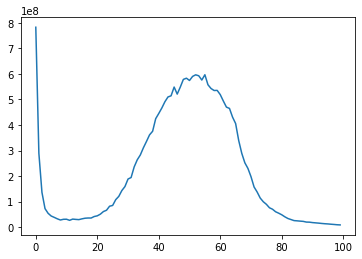

In [27]:
opt_c = BayesSearchCV(
    MPDLLRClassifier(X_c="split",normalize = True, max_iter = 100),
    {
        'lmd': Real(1e-6, 1e+6, prior='uniform'),
        'beta': Real(1e-6, 1e+6, prior='uniform'),
        'alpha_1': Real(1e-6, 1e+6, prior='uniform'),
        'alpha_2': Real(1e-6, 1e+6, prior='uniform'),
        'alpha_3': Real(1e-6, 1e+6, prior='uniform'),
        'tau': Real(1e-6, 1e+6, prior='uniform'),
        'a_1': Integer(10, 50),
        'a_2': Integer(50, qt),
    },
    scoring='f1_macro',
    n_iter=100,
    random_state=0,
    n_jobs=3,
    n_points=3,
    error_score='raise',
    verbose=2
)


opt_c.fit(X_res, y_res)

In [ ]:
cls_c = opt_c.best_estimator_

In [ ]:
opt_c.best_params_

### Evaluación

#### Reporte de clasificación

In [ ]:
y_pred = cls.predict(X_train)
print(classification_report(y_train, y_pred))

In [ ]:
y_pred = cls.predict(X_1)
print(classification_report(y_test, y_pred))

In [ ]:
y_pred = cls.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Metal', 'Plastic'])

In [ ]:
y_pred = cls.predict(X_new[(y_new == 1) | (y_new == 2)])
print(classification_report(y_new[(y_new == 1) | (y_new == 2)]-1, y_pred))

In [ ]:
y_pred = cls.predict(X_6[(y_6 == 1) | (y_6 == 2)])
print(classification_report(y_6[(y_6 == 1) | (y_6 == 2)]-1, y_pred))

#### Remoción del fondo

In [ ]:
c_scan, _, _, _ =read_c_scan(r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\C-Scans Daniel\C_Scan_time_raw_6.h5", 'x')
b_scan = np.real(c_scan[:, 70, :100])
b_scan = b_scan
b_scan_t = cls.remove_clutter(b_scan)
sp_t = cls.get_coding(b_scan)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30, 10))
ax1.pcolor(x, t[:qt]/10**-9, b_scan[:, :qt].swapaxes(0, 1), cmap='gist_gray')
ax1.invert_yaxis()

ax2.pcolor(x, t[:qt]/10**-9, b_scan_t[:, :qt].swapaxes(0, 1), cmap='gist_gray')
ax2.invert_yaxis()

ax3.pcolor(sp_t.swapaxes(0, 1), cmap='gist_gray')
ax3.invert_yaxis()

In [ ]:
c_scan, _, _, _ =read_c_scan(r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\C-Scans Daniel\C_Scan_time_raw_11.h5", 'x')
b_scan = np.real(c_scan[:, 70, :qt])
b_scan = b_scan
b_scan_t = cls_c.remove_clutter(b_scan)
sp_t = cls_c.get_coding(b_scan)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30, 10))
ax1.pcolor(x, t[:qt]/10**-9, b_scan[:, :qt].swapaxes(0, 1), cmap='gist_gray')
ax1.invert_yaxis()

ax2.pcolor(x, t[:qt]/10**-9, b_scan_t[:, :qt].swapaxes(0, 1), cmap='gist_gray')
ax2.invert_yaxis()

ax3.pcolor(sp_t.swapaxes(0, 1), cmap='gist_gray')
ax3.invert_yaxis()

## Modelo de Detección y Clasificación

### Submuestreo

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

rus = RandomUnderSampler(random_state=4)
#ros = RandomOverSampler(random_state=27)
X_res, y_res = rus.fit_resample(X_train, y_train)
#X_res, y_res = ros.fit_resample(X_res, y_res)
# #from scipy.ndimage.interpolation import shift
X_res_forward = np.roll(X_res, 1, axis=1)
X_res_backward = np.roll(X_res, -1, axis=1)

X_res = np.row_stack((X_res,X_res_forward, X_res_backward ))
y_res = np.concatenate((y_res, y_res, y_res))

In [93]:
print(f"Number of traces labeled 0: {np.count_nonzero(y_res == 0)}")
print(f"Number of traces labeled 1: {np.count_nonzero(y_res == 1)}")
print(f"Number of traces labeled 2: {np.count_nonzero(y_res == 2)}")

Number of traces labeled 0: 702
Number of traces labeled 1: 702
Number of traces labeled 2: 702


In [ ]:
X_res_backward

In [ ]:
X_res_forward

### Entrenamiento del modelo

#### Con optimización Bayesiana

In [94]:
opt = BayesSearchCV(
    MPDLLRClassifier(X_c="split", normalize=True, max_iter = 100, patience=50),
    {
        'lmd': Real(1e1, 1e+6, prior='log-uniform'),
        'beta': Real(1e1, 1e+6, prior='log-uniform'),
        'alpha_1': Real(1e-6, 1e+6, prior='log-uniform'),
        'alpha_2': Real(1e-6, 1e+6, prior='log-uniform'),
        'alpha_3': Real(1e-6, 1e+6, prior='log-uniform'),
        'tau': Real(1e-6, 1e+6, prior='log-uniform'),
        'a_1': Integer(10, qt),
        'a_2': Integer(50, qt),
    },
    scoring='f1_macro',
    n_iter=1000,
    random_state=0,
    n_jobs=3,
    n_points=3,
    error_score=0,
    verbose=2
)


opt.fit(X_res, y_res)
cls = opt.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates

C:\Users\leone\anaconda3\envs\Demining\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates

KeyboardInterrupt: 

In [95]:
cls  = opt.best_estimator_

AttributeError: 'BayesSearchCV' object has no attribute 'best_estimator_'

In [30]:
opt

NameError: name 'opt' is not defined

In [62]:
opt.best_params_

OrderedDict([('a_1', 64),
             ('a_2', 90),
             ('alpha_1', 0.2178532794014559),
             ('alpha_2', 1000000.0),
             ('alpha_3', 1.5107480362903055e-06),
             ('beta', 610.8169040169865),
             ('lmd', 322777.4489980505),
             ('tau', 0.0016612170062864382)])

In [ ]:
opt.best_params_

In [ ]:
opt.best_params_

In [76]:
#Best now -2
opt.best_params_


OrderedDict([('a_1', 36),
             ('a_2', 53),
             ('alpha_1', 1e-06),
             ('alpha_2', 11431.291728492579),
             ('alpha_3', 918860.7309404449),
             ('beta', 981243.2467211566),
             ('lmd', 894552.6357556109),
             ('tau', 1e-06)])

#### Con parámetros

DEBUG:dictionary_learning.mpdl_lr:H before if: [1 0 0]
DEBUG:dictionary_learning.mpdl_lr:H after if: [1 0 0]
DEBUG:dictionary_learning.mpdl_lr:H after swap: [1 0 0]
DEBUG:dictionary_learning.mpdl_lr:H calculated from y with shape: (3, 2016)
DEBUG:dictionary_learning.mpdl_lr:W initialized with shape: (3, 36)
DEBUG:dictionary_learning.mpdl_lr:B initialized with shape: (3, 2016)
DEBUG:dictionary_learning.mpdl_lr:A_1 initialized with shape: (36, 53)
DEBUG:dictionary_learning.mpdl_lr:A_2 initialized with shape: (53, 90)
DEBUG:dictionary_learning.mpdl_lr:SDV for P took: 0.08830539999999587 s
DEBUG:dictionary_learning.mpdl_lr:P initialized with shape: ()
DEBUG:dictionary_learning.mpdl_lr:D list initialized
DEBUG:dictionary_learning.mpdl_lr:S list initialized
DEBUG:dictionary_learning.mpdl_lr:Phi list initialized
DEBUG:dictionary_learning.mpdl_lr:Y calculated from D and S  with shape: (90, 2016)
DEBUG:dictionary_learning.mpdl_lr:Y hat calculated from Phi and  with shape: (36, 2016)
DEBUG:dicti

MPDLLRClassifier(X_c='split', a_1=36, a_2=53, alpha_1=1e-06,
                 alpha_2=11431.291728492579, alpha_3=918860.7309404449,
                 beta=981243.2467211566, lmd=894552.6357556109, max_iter=500,
                 tau=1e-06,
                 transfer_function=<function soft_plus at 0x000001A1C8709C10>)

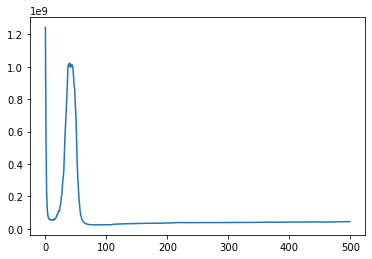

In [28]:
cls = MPDLLRClassifier(a_1 = 36,
                       a_2 = 53,
                       alpha_1 = 1e-06,
                       alpha_2 = 11431.291728492579,
                       alpha_3 = 918860.7309404449,
                       beta = 981243.2467211566,
                       lmd=894552.6357556109,
                       tau=1e-06,
                       transfer_function="soft_plus",
                       X_c="split",
                       normalize=True,
                       max_iter = 500)
cls.fit(X_res, y_res)

#### Partial BO

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 2 candidates

DEBUG:dictionary_learning.mpdl_lr:H before if: [0]
DEBUG:dictionary_learning.mpdl_lr:Entered in H if
DEBUG:dictionary_learning.mpdl_lr:H after if: [1 0]
DEBUG:dictionary_learning.mpdl_lr:H after swap: [1 0]
DEBUG:dictionary_learning.mpdl_lr:H calculated from y with shape: (2, 1428)
DEBUG:dictionary_learning.mpdl_lr:W initialized with shape: (2, 36)
DEBUG:dictionary_learning.mpdl_lr:B initialized with shape: (2, 1428)
DEBUG:dictionary_learning.mpdl_lr:A_1 initialized with shape: (36, 53)
DEBUG:dictionary_learning.mpdl_lr:A_2 initialized with shape: (53, 90)
DEBUG:dictionary_learning.mpdl_lr:SDV for P took: 0.0235298999978113 s
DEBUG:dictionary_learning.mpdl_lr:P initialized with shape: ()
DEBUG:dictionary_learning.mpdl_lr:D list initialized
DEBUG:dictionary_learning.mpdl_lr:S list initialized
DEBUG:dictionary_learning.mpdl_lr:Phi list initialized
DEBUG:dictionary_learning.mpdl_lr:Y calculated from D and S  with shape: (90, 1428)
DEBUG:dictionary_learning.mpdl_lr:Y hat calculated from Ph

BayesSearchCV(error_score=0,
              estimator=MPDLLRClassifier(X_c='split', a_1=36, a_2=53,
                                         beta=981243.2467211566,
                                         lmd=894552.6357556109),
              n_jobs=3, n_points=3, random_state=0, scoring='f1_macro',
              search_spaces={'alpha_1': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize'),
                             'alpha_2': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize'),
                             'alpha_3': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize'),
                             'tau': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')},
              verbose=2)

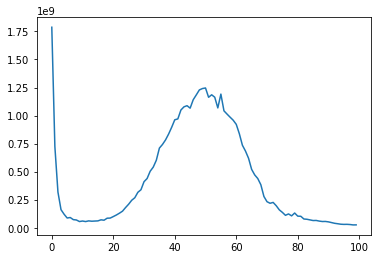

In [75]:
opt = BayesSearchCV(
    MPDLLRClassifier(a_1 = 36,
                       a_2 = 53,
                       #alpha_1 = 1e-06,
                       #alpha_2 = 11431.291728492579,
                       #alpha_3 = 918860.7309404449,
                       beta = 981243.2467211566,
                       lmd=894552.6357556109,
                       #tau=1e-06,
                       transfer_function="soft_plus",
                       X_c="split",
                       normalize=True,
                       max_iter = 100),
    {
        #'lmd': Real(1e-6, 1e+6, prior='uniform'),
        #'beta': Real(1e-6, 1e+6, prior='uniform'),
        'alpha_1': Real(1e-6, 1e+6, prior='log-uniform'),
        'alpha_2': Real(1e-6, 1e+6, prior='log-uniform'),
        'alpha_3': Real(1e-6, 1e+6, prior='log-uniform'),
        'tau': Real(1e-6, 1e+6, prior='log-uniform'),
        #'a_1': Integer(10, 50),
        #'a_2': Integer(50, 100),
    },
    scoring='f1_macro',
    n_iter=50,
    random_state=0,
    n_jobs=3,
    n_points=3,
    error_score=0,
    verbose=2
)


opt.fit(X_res, y_res)

In [81]:
opt.best_score_

0.8667111292648796

In [82]:
cls = opt.best_estimator_

### Evaluación

#### Reporte de Clasificación

In [40]:
y_pred = cls.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.90     94958
         1.0       0.03      0.99      0.06       236
         2.0       0.02      0.97      0.05       234

    accuracy                           0.83     95428
   macro avg       0.35      0.93      0.34     95428
weighted avg       1.00      0.83      0.90     95428



In [41]:
y_pred = cls.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90     23748
         1.0       0.03      0.98      0.06        54
         2.0       0.02      0.98      0.04        56

    accuracy                           0.83     23858
   macro avg       0.35      0.93      0.33     23858
weighted avg       1.00      0.83      0.90     23858



DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000002AB6E4BB610>


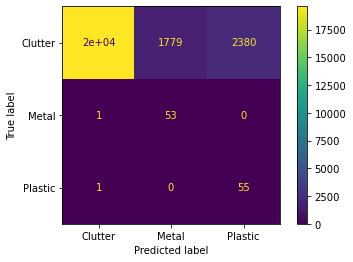

In [42]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Clutter", "Metal", "Plastic"])

In [78]:
y_pred = cls.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85      7901
         1.0       0.02      0.96      0.05        52

    accuracy                           0.74      7953
   macro avg       0.51      0.85      0.45      7953
weighted avg       0.99      0.74      0.85      7953



#### Remoción de fondo

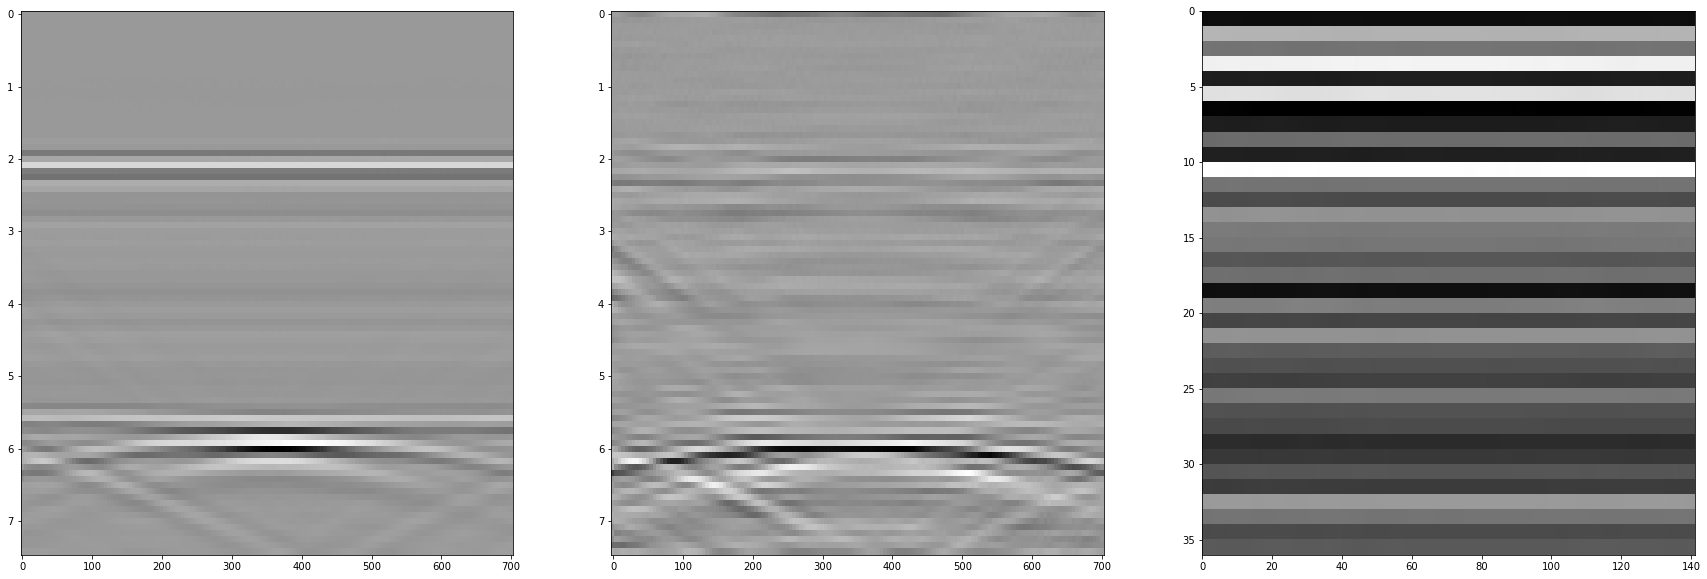

In [74]:
c_scan, _, _, _ =read_c_scan(r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\C-Scans Daniel\C_Scan_time_raw_6.h5", 'x')
b_scan = np.real(c_scan[:, 70, :qt])
b_scan = b_scan
b_scan_t = cls.remove_clutter(b_scan)
sp_t = cls.get_coding(b_scan)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30, 10))
ax1.pcolor(x, t[:qt]/10**-9, b_scan[:, :qt].swapaxes(0, 1), cmap='gist_gray')
ax1.invert_yaxis()

ax2.pcolor(x, t[:qt]/10**-9, b_scan_t[:, :qt].swapaxes(0, 1), cmap='gist_gray')
ax2.invert_yaxis()

ax3.pcolor(sp_t.swapaxes(0, 1), cmap='gist_gray')
ax3.invert_yaxis()

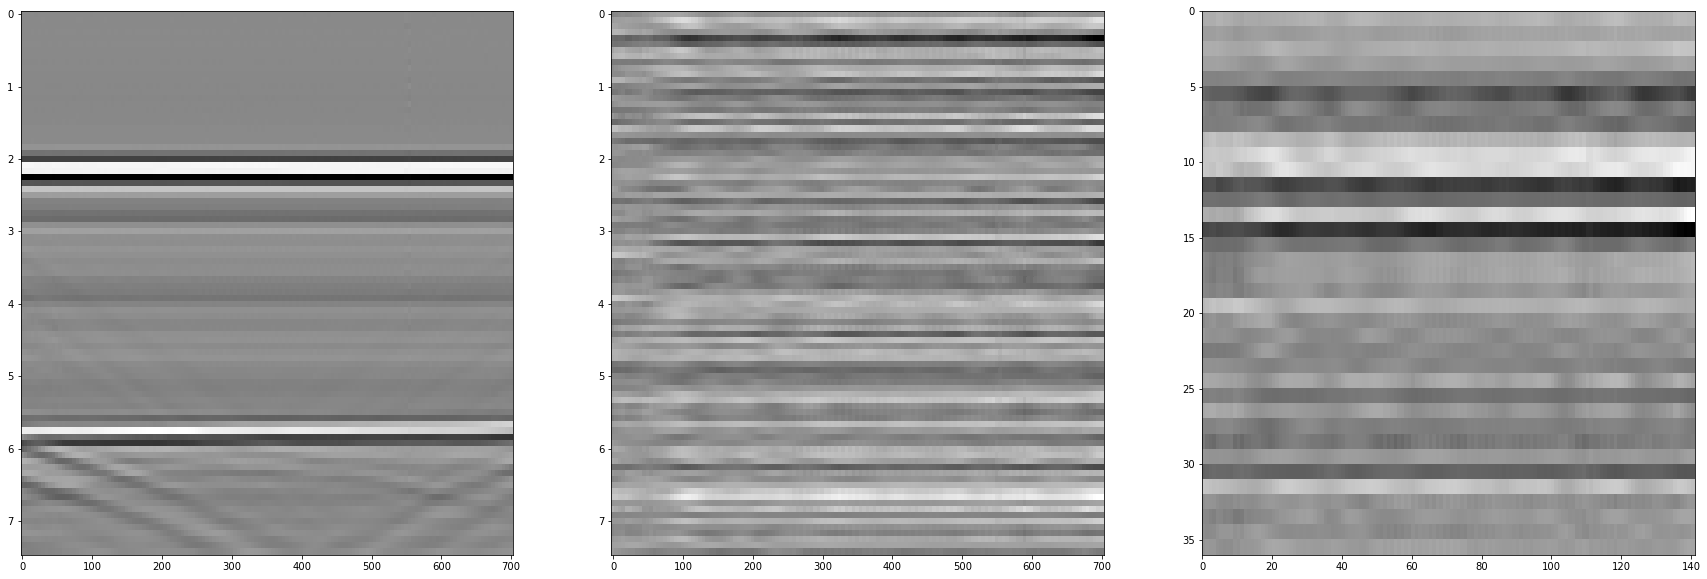

In [80]:
c_scan, _, _, _ = read_c_scan(
    r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\C-Scans Gabriel\C_scan_default_title_2.h5",
    'x')
b_scan = np.real(c_scan[:, 70, :qt])
b_scan = b_scan
b_scan_t = cls.remove_clutter(b_scan)
sp_t = cls.get_coding(b_scan)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
ax1.pcolor(x, t[:qt] / 10 ** -9, b_scan[:, :qt].swapaxes(0, 1), cmap='gist_gray')
ax1.invert_yaxis()

ax2.pcolor(x, t[:qt] / 10 ** -9, b_scan_t[:, :qt].swapaxes(0, 1), cmap='gist_gray')
ax2.invert_yaxis()

ax3.pcolor(sp_t.swapaxes(0, 1), cmap='gist_gray')
ax3.invert_yaxis()

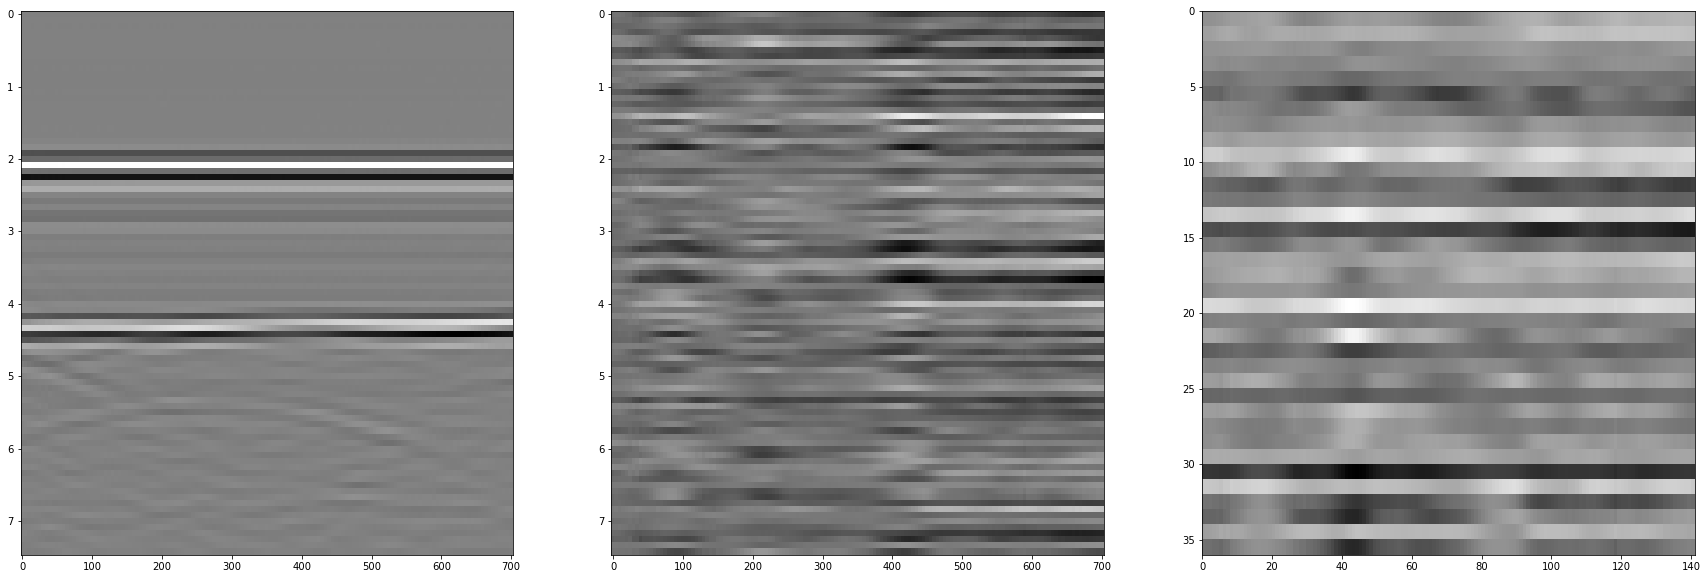

In [79]:
c_scan, _, _, _ =read_c_scan(r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\Nuevas mediciones\Time\C_scan_default_title_2_new.h5", 'x')
b_scan = np.real(c_scan[:, 35, :qt])
b_scan = b_scan
b_scan_t = cls.remove_clutter(b_scan)
sp_t = cls.get_coding(b_scan)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30, 10))
ax1.pcolor(x, t[:qt]/10**-9, b_scan[:, :qt].swapaxes(0, 1), cmap='gist_gray')
ax1.invert_yaxis()

ax2.pcolor(x, t[:qt]/10**-9, b_scan_t[:, :qt].swapaxes(0, 1), cmap='gist_gray')
ax2.invert_yaxis()

ax3.pcolor(sp_t.swapaxes(0, 1), cmap='gist_gray')
ax3.invert_yaxis()

#### Working

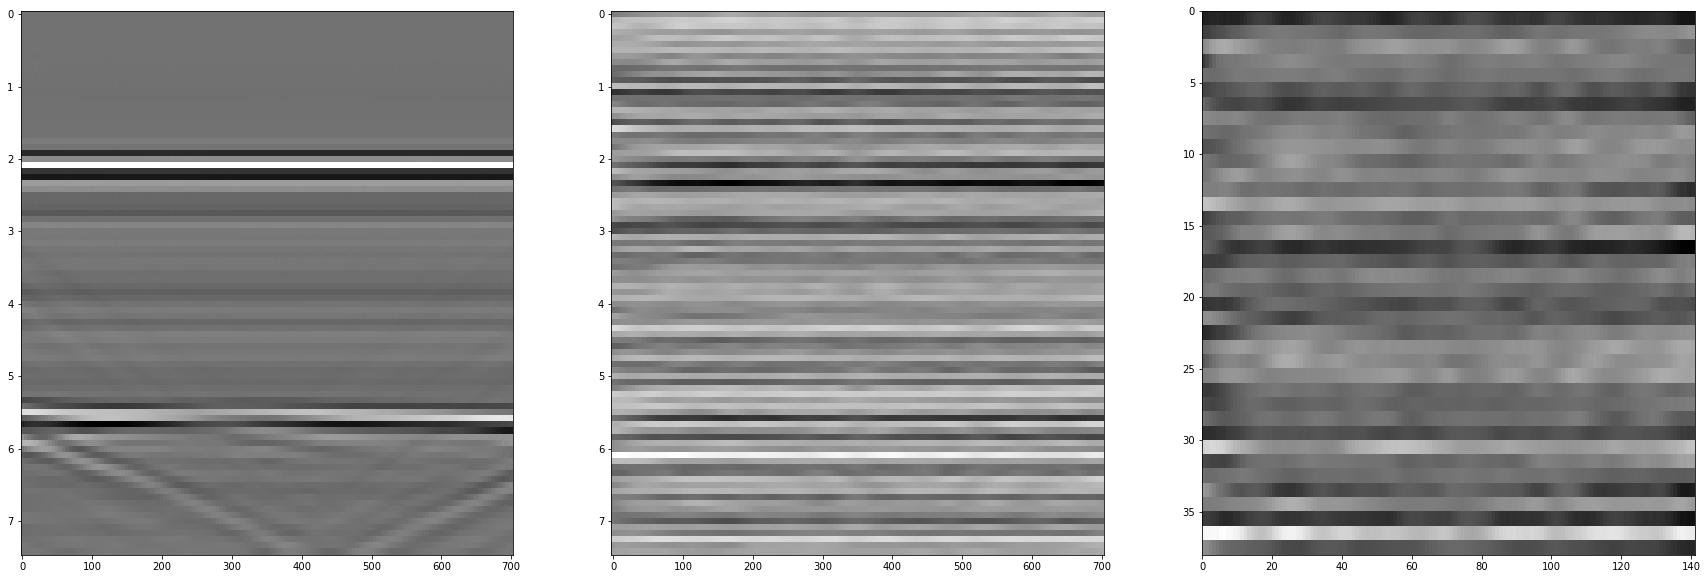

In [54]:
c_scan, _, _, _ =read_c_scan(r"C:\Users\leone\OneDrive - Universidad de los Andes\Universidad\Proyecto Desminado\Machine Learning\C-Scans Daniel\C_Scan_time_raw_5.h5", 'x')
b_scan = np.real(c_scan[:, 70, :qt])
b_scan = b_scan
b_scan_t = cls.remove_clutter(b_scan)
sp_t = cls.get_coding(b_scan)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30, 10))
ax1.pcolor(x, t[:qt]/10**-9, b_scan[:, :qt].swapaxes(0, 1), cmap='gist_gray')
ax1.invert_yaxis()

ax2.pcolor(x, t[:qt]/10**-9, b_scan_t[:, :qt].swapaxes(0, 1), cmap='gist_gray')
ax2.invert_yaxis()

ax3.pcolor(sp_t.swapaxes(0, 1), cmap='gist_gray')
ax3.invert_yaxis()

#### Escenarios Daniel

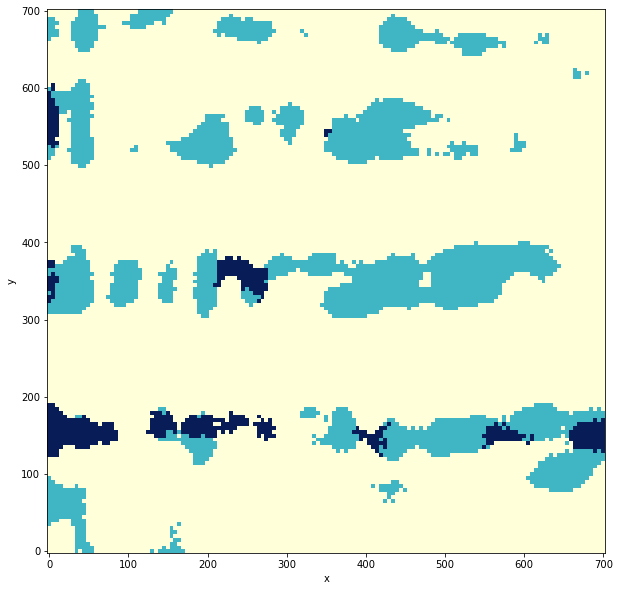

In [49]:
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
y_pred = cls.predict(X_1)
plot_mine_map(x, y, np.reshape(y_pred, (x.size, y.size)))

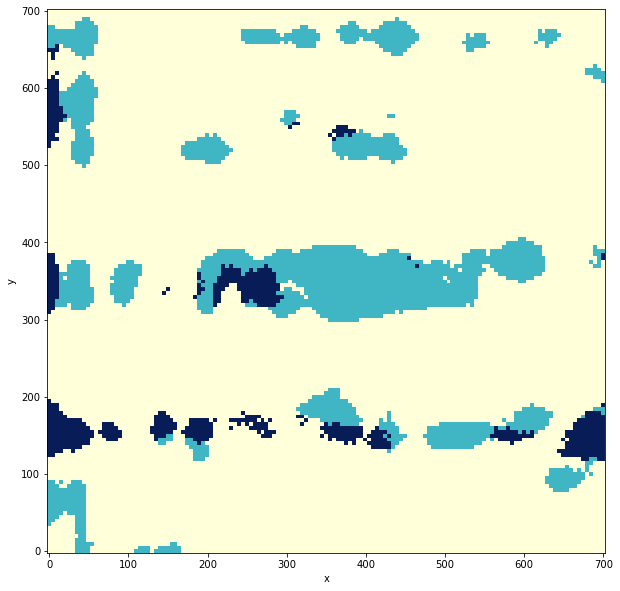

In [50]:
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
y_pred = cls.predict(X_2)
plot_mine_map(x, y, np.reshape(y_pred, (x.size, y.size)))

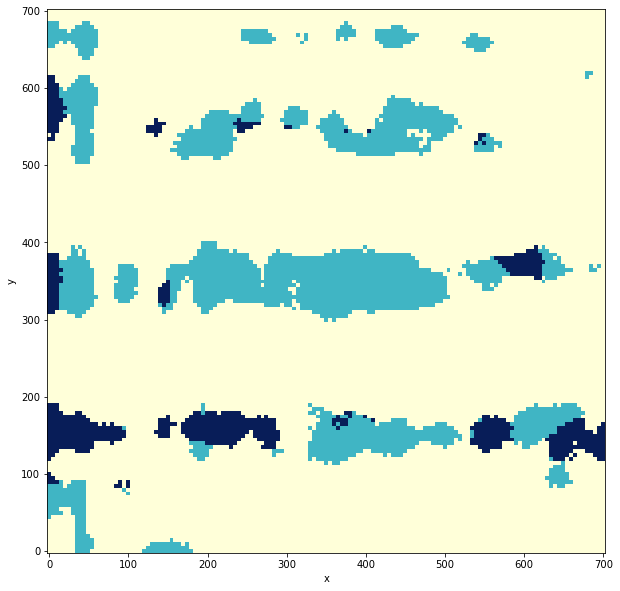

In [51]:
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
y_pred = cls.predict(X_3)
plot_mine_map(x, y, np.reshape(y_pred, (x.size, y.size)))

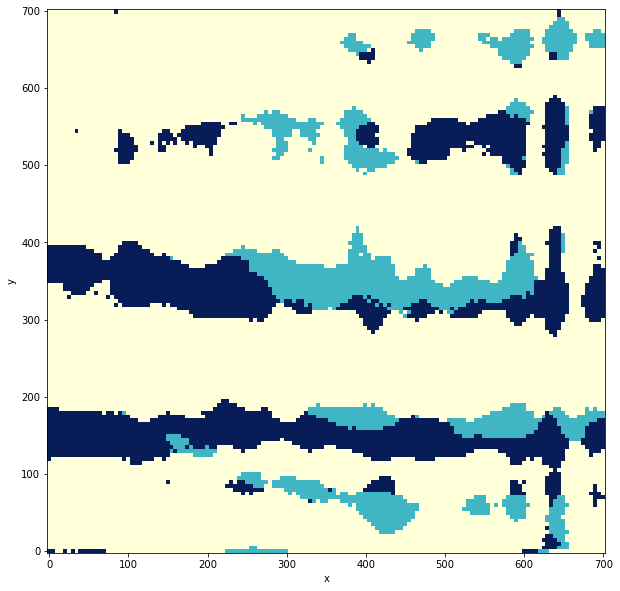

In [52]:
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
y_pred = cls.predict(X_4)
plot_mine_map(x, y, np.reshape(y_pred, (x.size, y.size)))

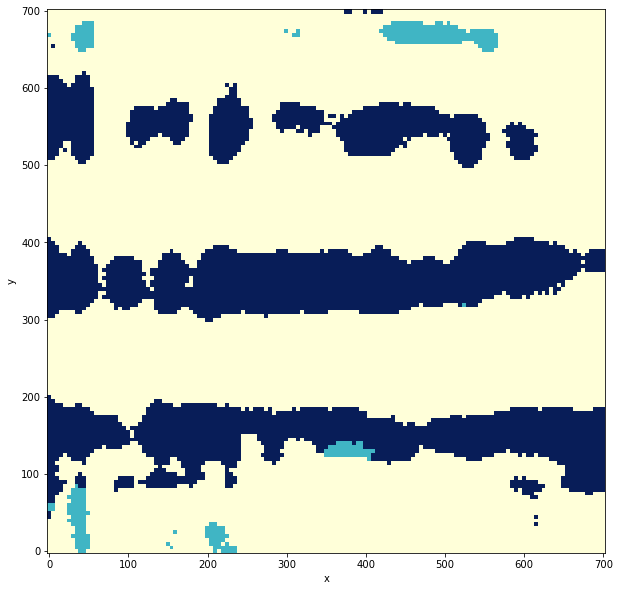

In [54]:
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
y_pred = cls.predict(X_5)
plot_mine_map(x, y, np.reshape(y_pred, (x.size, y.size)))

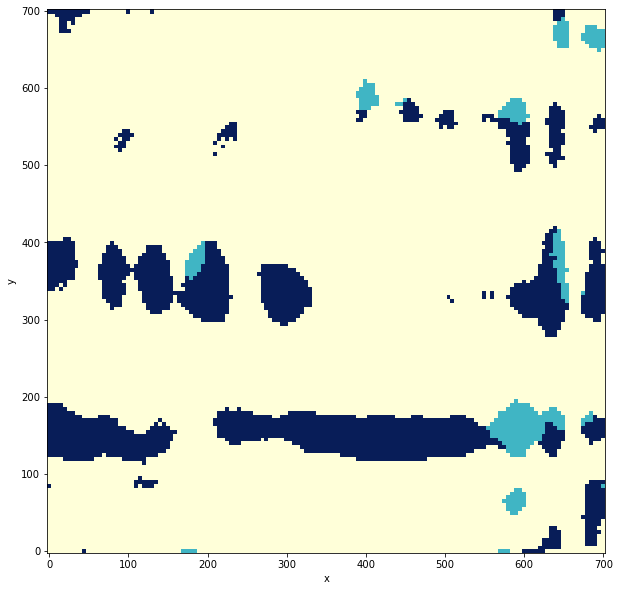

In [55]:
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
y_pred = cls.predict(X_6)
plot_mine_map(x, y, np.reshape(y_pred, (x.size, y.size)))

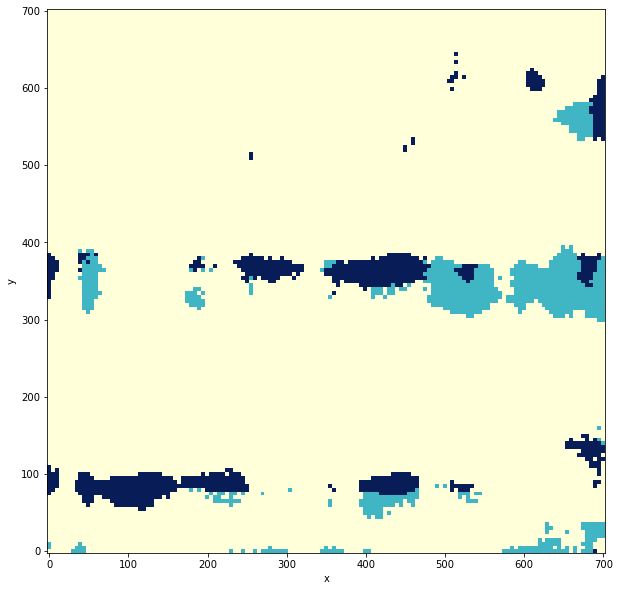

In [56]:
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
y_pred = cls.predict(X_10)
plot_mine_map(x, y, np.reshape(y_pred, (x.size, y.size)))

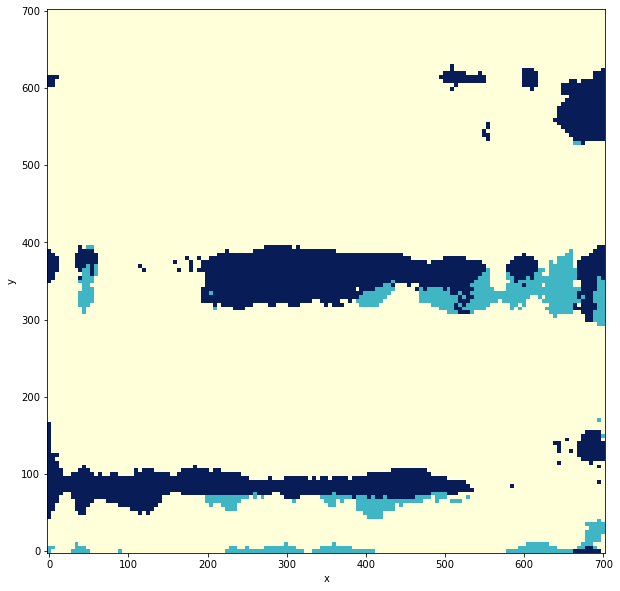

In [57]:
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
y_pred = cls.predict(X_11)
plot_mine_map(x, y, np.reshape(y_pred, (x.size, y.size)))

#### Escenarios Gabriel

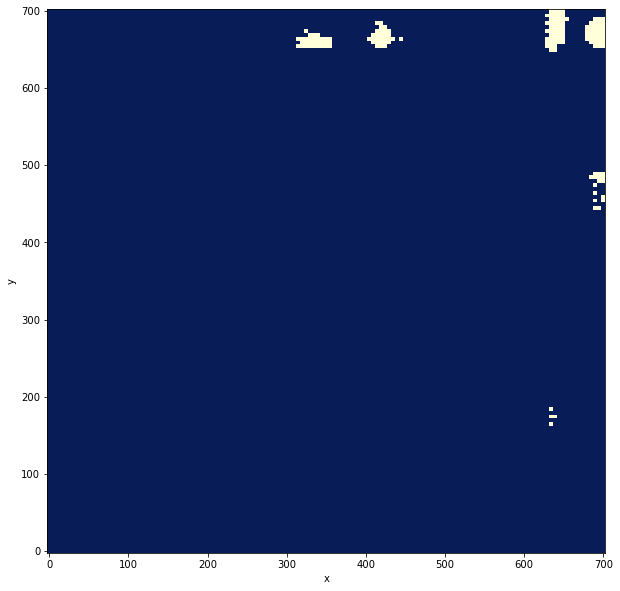

In [58]:
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
y_pred = cls.predict(X_1_g)
plot_mine_map(x, y, np.reshape(y_pred, (x.size, y.size)))

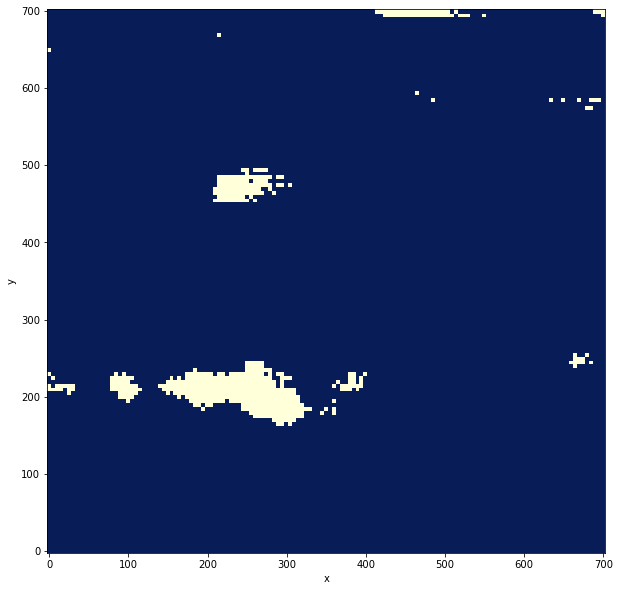

In [59]:
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
y_pred = cls.predict(X_2_g)
plot_mine_map(x, y, np.reshape(y_pred, (x.size, y.size)))

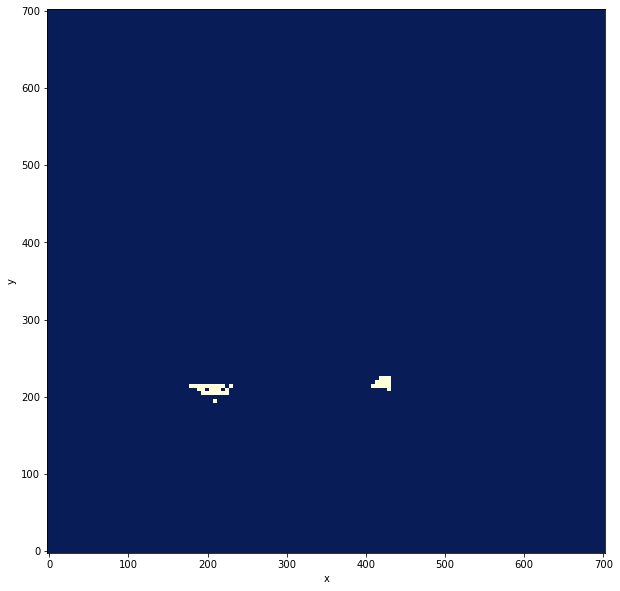

In [60]:
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
y_pred = cls.predict(X_3_g)
plot_mine_map(x, y, np.reshape(y_pred, (x.size, y.size)))

### Escenarios Nuevos

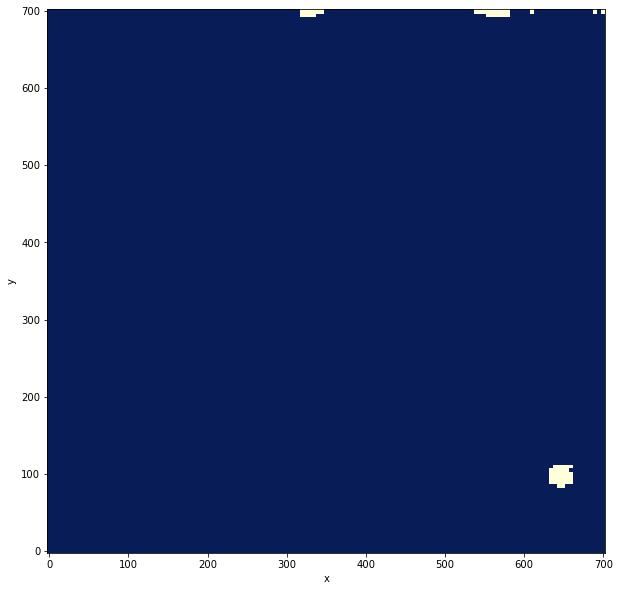

In [61]:
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
y_pred = cls.predict(X_0_125_new)
plot_mine_map(x, y, np.reshape(y_pred, (x.size, y.size)))

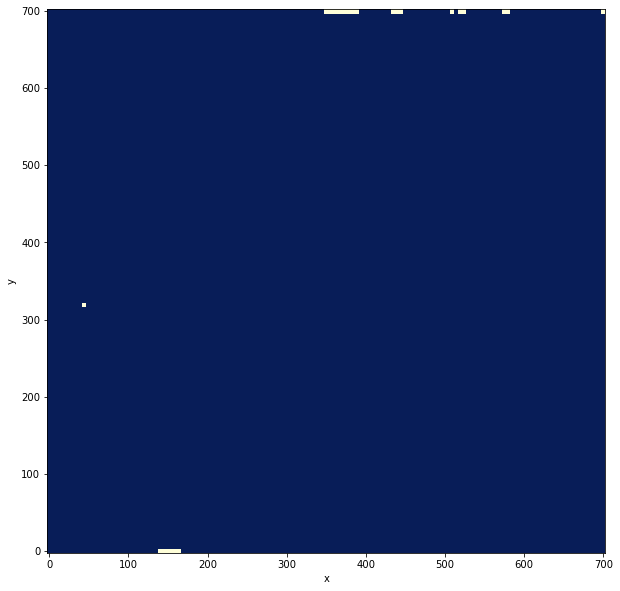

In [62]:
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
y_pred = cls.predict(X_0_34_new)
plot_mine_map(x, y, np.reshape(y_pred, (x.size, y.size)))

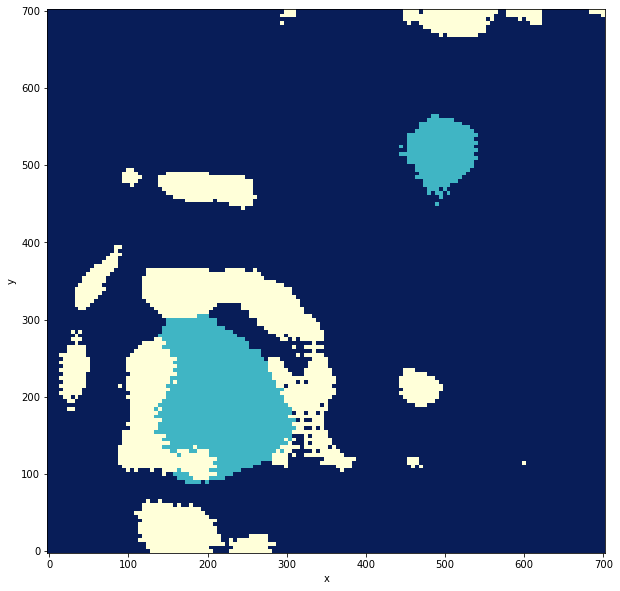

In [63]:
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
y_pred = cls.predict(X_1_new)
plot_mine_map(x, y, np.reshape(y_pred, (x.size, y.size)))

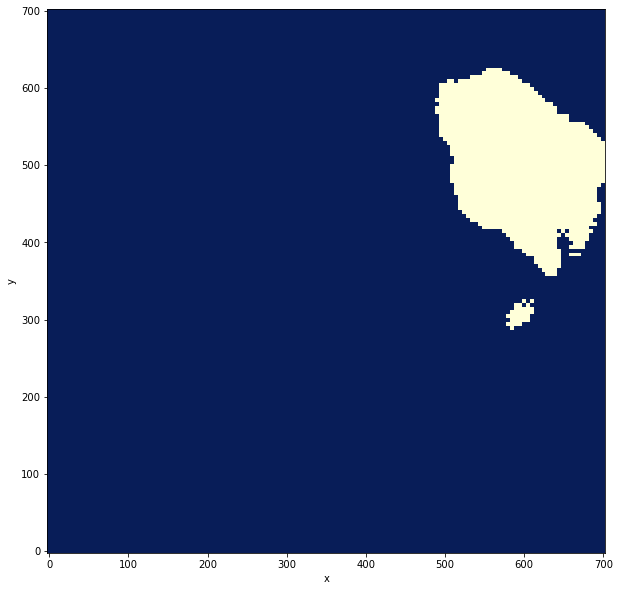

In [65]:
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
y_pred = cls.predict(X_2_new)
plot_mine_map(x, y, np.reshape(y_pred, (x.size, y.size)))

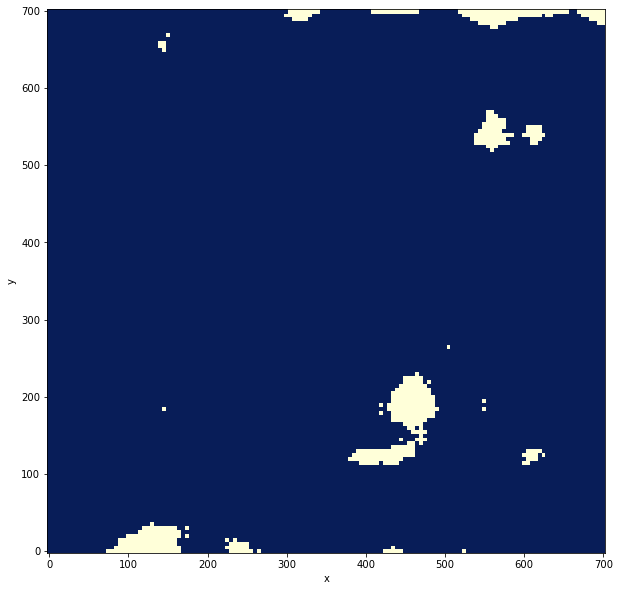

In [66]:
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
y_pred = cls.predict(X_4_new)
plot_mine_map(x, y, np.reshape(y_pred, (x.size, y.size)))

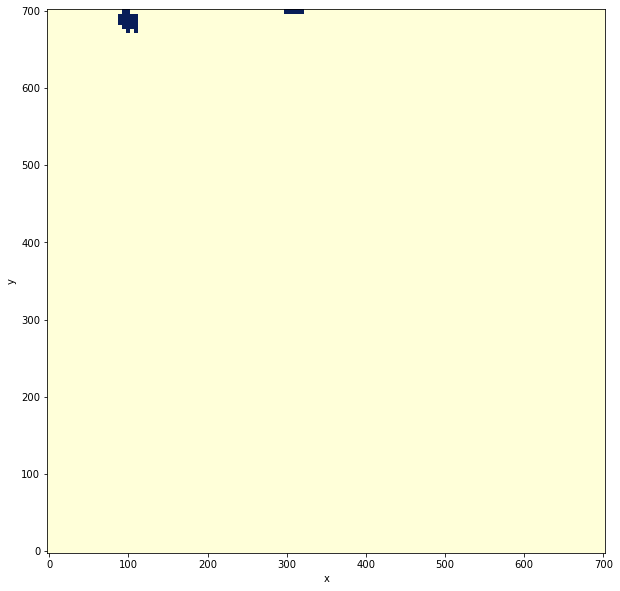

In [63]:
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)
y_pred = cls.predict(X_5_new)
plot_mine_map(x, y, np.reshape(y_pred, (x.size, y.size)))

#### Working

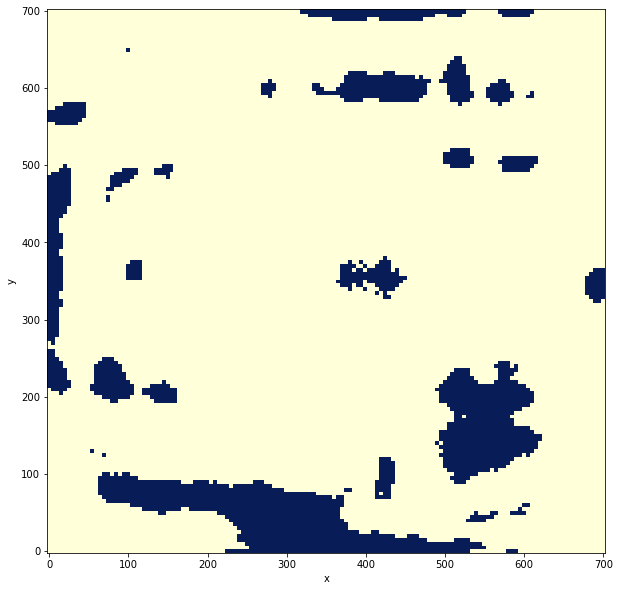

In [90]:
x = np.linspace(0, 700, qx)
y = np.linspace(0, 700, qy)

y_pred = cls.predict(X_6)
plot_mine_map(x, y, np.reshape(y_pred, (x.size, y.size)))